In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [3]:
# This function is the Riegel formula for predicting race time T2 over distance D2 
# from a previous time T1 over a distance D1

def Riegel(T1_sec, D1, D2):
    T2_sec = (T1_sec) * (float(D2)/float(D1))*1.06
    return T2_sec

# convert times in the format min:sec or min:sec:millisec (e.g. 14:32 or 14:32:00) to seconds
def time_to_secs(time):
    secs = int(float(str(time)[:2])*60 + float(str(time)[3:5]))
    return secs

def time_to_secs_hours(time):
    secs = int(float(str(time)[0])*60*60 + float(str(time)[2:4])*60 + float(str(time)[6:8])*60)
    return secs

In [9]:
# Read the data into a pandas dataframe

df_M = pd.read_csv('runbritain_data_2016_M_5K.csv')
print df_M.head()

   athleteid age_group     5K    10K     HM  Mar
0       5577       SEN  13:52    NaN    NaN  NaN
1      19569       U23  14:03  29:30    NaN  NaN
2      17296       SEN  14:04  29:55    NaN  NaN
3      12131       SEN  14:06    NaN    NaN  NaN
4      47493       SEN  14:06  29:43  65:24  NaN


In [44]:
athlete_M_HM = [time_to_secs(i) for i in df_M['HM'] if str(i) != 'nan' and int(str(i)[0]) > 3]
athlete_HM_2 = [time_to_secs_hours(i) for i in df_M['HM'] if str(i) != 'nan' and int(str(i)[0]) < 3]
athlete_M_HM = athlete_M_HM + athlete_HM_2
athlete_M_5k_HM = [time_to_secs(df_M['5K'][i]) for i in range(0, len(df_M['5K'])) if str(df_M['HM'][i]) != 'nan']

athlete_M_Mar = [time_to_secs_hours(i) for i in df_M['Mar'] if str(i) != 'nan']
athlete_M_5k_Mar = [time_to_secs(df_M['5K'][i]) for i in range(0, len(df_M['5K'])) if str(df_M['Mar'][i]) != 'nan']

athlete_M_10k = [time_to_secs(i) for i in df_M['10K'] if str(i) != 'nan']
athlete_M_5k_10k = [time_to_secs(df_M['5K'][i]) for i in range(0, len(df_M['5K'])) if str(df_M['10K'][i]) != 'nan']

In [32]:
# Make an array for 5k times and calculate 10k times using the Riegel formula

#time_5k = np.arange(15*60, 21*60, 10)
#time_10k = [Riegel(i, 5, 10) for i in time_5k]

time_5k = np.arange(athlete_M_5k_10k[0], athlete_M_5k_10k[-1]+11, 10)
time_10k = [Riegel(i, 5, 10) for i in time_5k]
time_HM = [Riegel(i, 5, 21.24334) for i in time_5k]
time_Mar = [Riegel(i, 5, 42.16481) for i in time_5k]

In [34]:
# Convert all times into minutes and plot both the model and the times

time_5k_mins = [i/60.0 for i in time_5k]
time_10k_mins = [i/60.0 for i in time_10k]
time_HM_mins = [i/60.0 for i in time_HM]
time_Mar_mins = [i/60.0 for i in time_Mar]

athlete_M_10k_mins = [i/60.0 for i in athlete_M_10k]
athlete_M_5k_10k_mins = [i/60.0 for i in athlete_M_5k_10k]

athlete_M_HM_mins = [i/60.0 for i in athlete_M_HM]
athlete_M_5k_HM_mins = [i/60.0 for i in athlete_M_5k_HM]

athlete_M_Mar_mins = [i/60.0 for i in athlete_M_Mar]
athlete_M_5k_Mar_mins = [i/60.0 for i in athlete_M_5k_Mar]

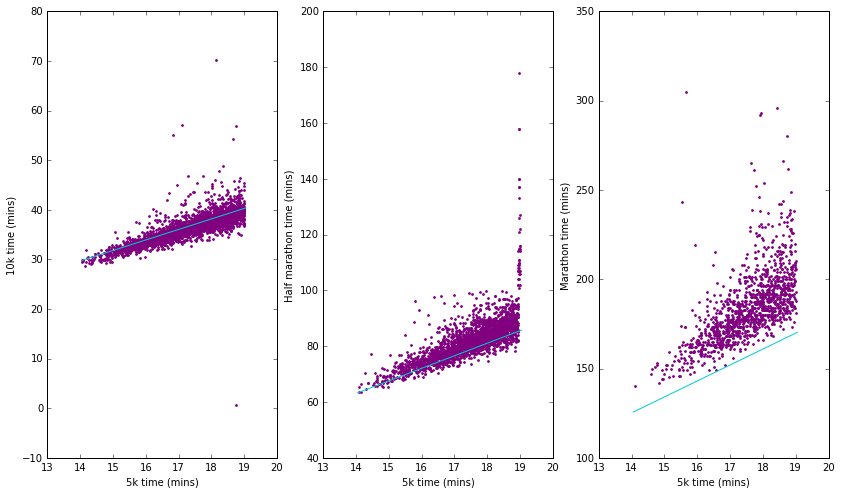

In [39]:
plt.figure(figsize = (14, 8))

plt.subplot(1, 3, 1)
plt.plot(time_5k_mins, time_10k_mins, color = 'darkturquoise')
plt.scatter(athlete_M_5k_10k_mins, athlete_M_10k_mins, color = 'purple', s = 3)
plt.xlabel("5k time (mins)")
plt.ylabel("10k time (mins)")

plt.subplot(1, 3, 2)
plt.plot(time_5k_mins, time_HM_mins, color = 'darkturquoise')
plt.scatter(athlete_M_5k_HM_mins, athlete_M_HM_mins, color = 'purple', s = 3)
plt.xlabel("5k time (mins)")
plt.ylabel("Half marathon time (mins)")

plt.subplot(1, 3, 3)
plt.plot(time_5k_mins, time_Mar_mins, color = 'darkturquoise')
plt.scatter(athlete_M_5k_Mar_mins, athlete_M_Mar_mins, color = 'purple', s = 3)
plt.xlabel("5k time (mins)")
plt.ylabel("Marathon time (mins)")

In [76]:
data_5K_M_full = []
data_10K_M_full = []
data_HM_M_full = []
data_Mar_M_full = []

for i in range(0, len(df_M['5K'])):
    if str(df_M['10K'][i]) != 'nan' and str(df_M['HM'][i]) != 'nan' and str(df_M['Mar'][i]) != 'nan':
        data_5K_M_full.append(time_to_secs(df_M['5K'][i]))
        data_10K_M_full.append(time_to_secs(df_M['10K'][i]))
        data_Mar_M_full.append(time_to_secs_hours(df_M['Mar'][i]))
        if int(str(df_M['HM'][i])[0]) > 3:
            data_HM_M_full.append(time_to_secs(df_M['HM'][i]))
        elif int(str(df_M['HM'][i])[0]) < 4:
            data_HM_M_full.append(time_to_secs_hours(df_M['HM'][i]))
            
data_M_full = np.array([data_5K_M_full, data_10K_M_full, data_HM_M_full, data_Mar_M_full])
data_M_full = np.transpose(data_M_full)

labels = ["5K", "10K", "HM", "Mar"]
df_data_M_full = pd.DataFrame(data_M_full, columns=labels)
print df_data_M_full.head()

    5K   10K    HM   Mar
0  846  1794  3815  8400
1  875  1853  3950  8820
2  878  1856  4077  9000
3  883  1798  3986  9060
4  887  1874  4054  9180


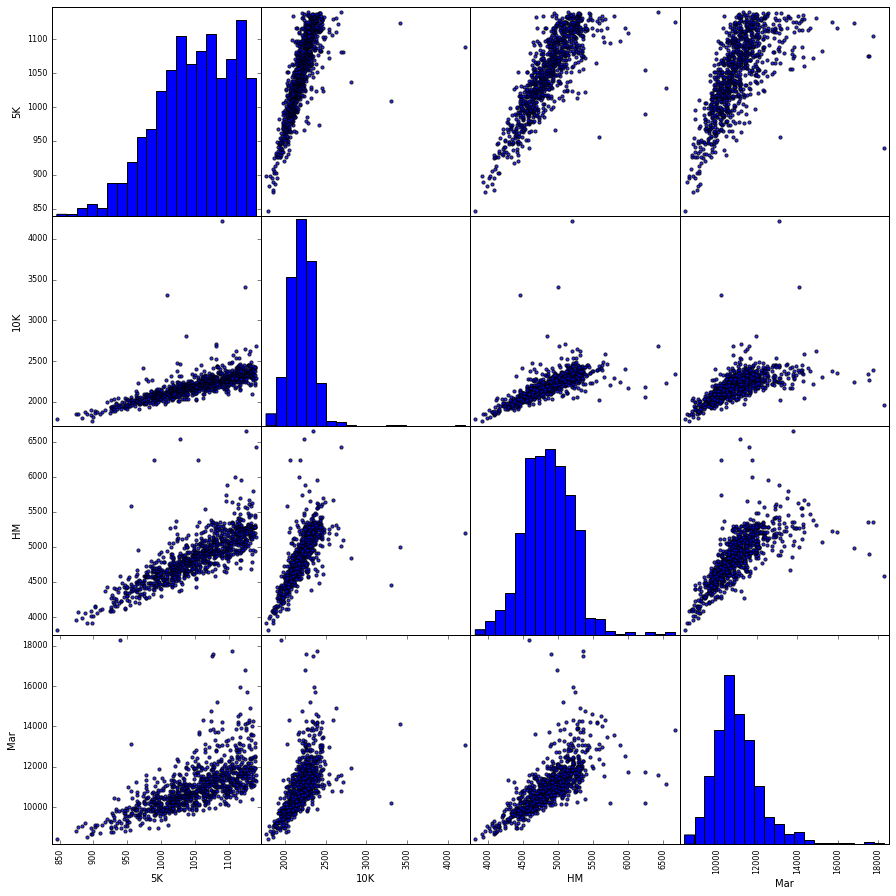

In [79]:
grr = pd.scatter_matrix(df_data_M_full, figsize=(15, 15),
                      marker='o', hist_kwds={'bins': 20}, s=10, alpha=.8)